I am using the **California Housing Prices dataset**, which contains historical data on housing prices in different areas. The dataset  features such as:

**longitude and latitude**(location coordinates)
**housing_median_age**(age of the house)
**total_bedrooms** (number of bedrooms)
**median_income** (income level in the area)
**median_house_value** (target variable)

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('housing.csv')
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [2]:
df.isnull().sum()
#total_bedroom fetures only contain null value

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [5]:
#checek total_bedrooms data
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# we also get Outliers so we replace missing value with median
# Fill missing values with the median
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
df.isnull().sum()

C:\Users\jayki\AppData\Local\Temp\ipykernel_9392\1921534648.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
#removing Outliers by median_income 
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers
    new_df= df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return new_df

# Apply the outlier removal function to relevant columns
columns_to_check = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'median_income','median_house_value','households','population']
print(f"Data shape before outlier removal: {df.shape}")
for col in columns_to_check:
    df = remove_outliers_iqr(df, col)

print(f"Data shape after outlier removal: {df.shape}")


Data shape before outlier removal: (20640, 10)
Data shape after outlier removal: (16932, 10)


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16932.000000,16932.000000,16932.000000,16932.000000,16932.000000,16932.000000,16932.000000,16932.000000,16932.000000
mean,-119.613394,35.714559,29.625325,2081.180900,429.363690,1155.158812,401.827900,3.569462,184874.143397
std,2.005417,2.174472,12.214165,1034.828379,202.444722,554.208406,189.028952,1.437403,91341.024295
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.780000,33.940000,19.000000,1348.000000,284.000000,755.000000,267.750000,2.482100,112500.000000
50%,-118.710000,34.400000,30.000000,1937.000000,406.000000,1090.000000,380.000000,3.390600,168900.000000
75%,-118.030000,37.750000,38.000000,2697.000000,556.000000,1512.000000,522.000000,4.486100,240025.000000
max,-114.490000,41.950000,52.000000,5688.000000,1045.000000,2726.000000,943.000000,7.955600,453100.000000


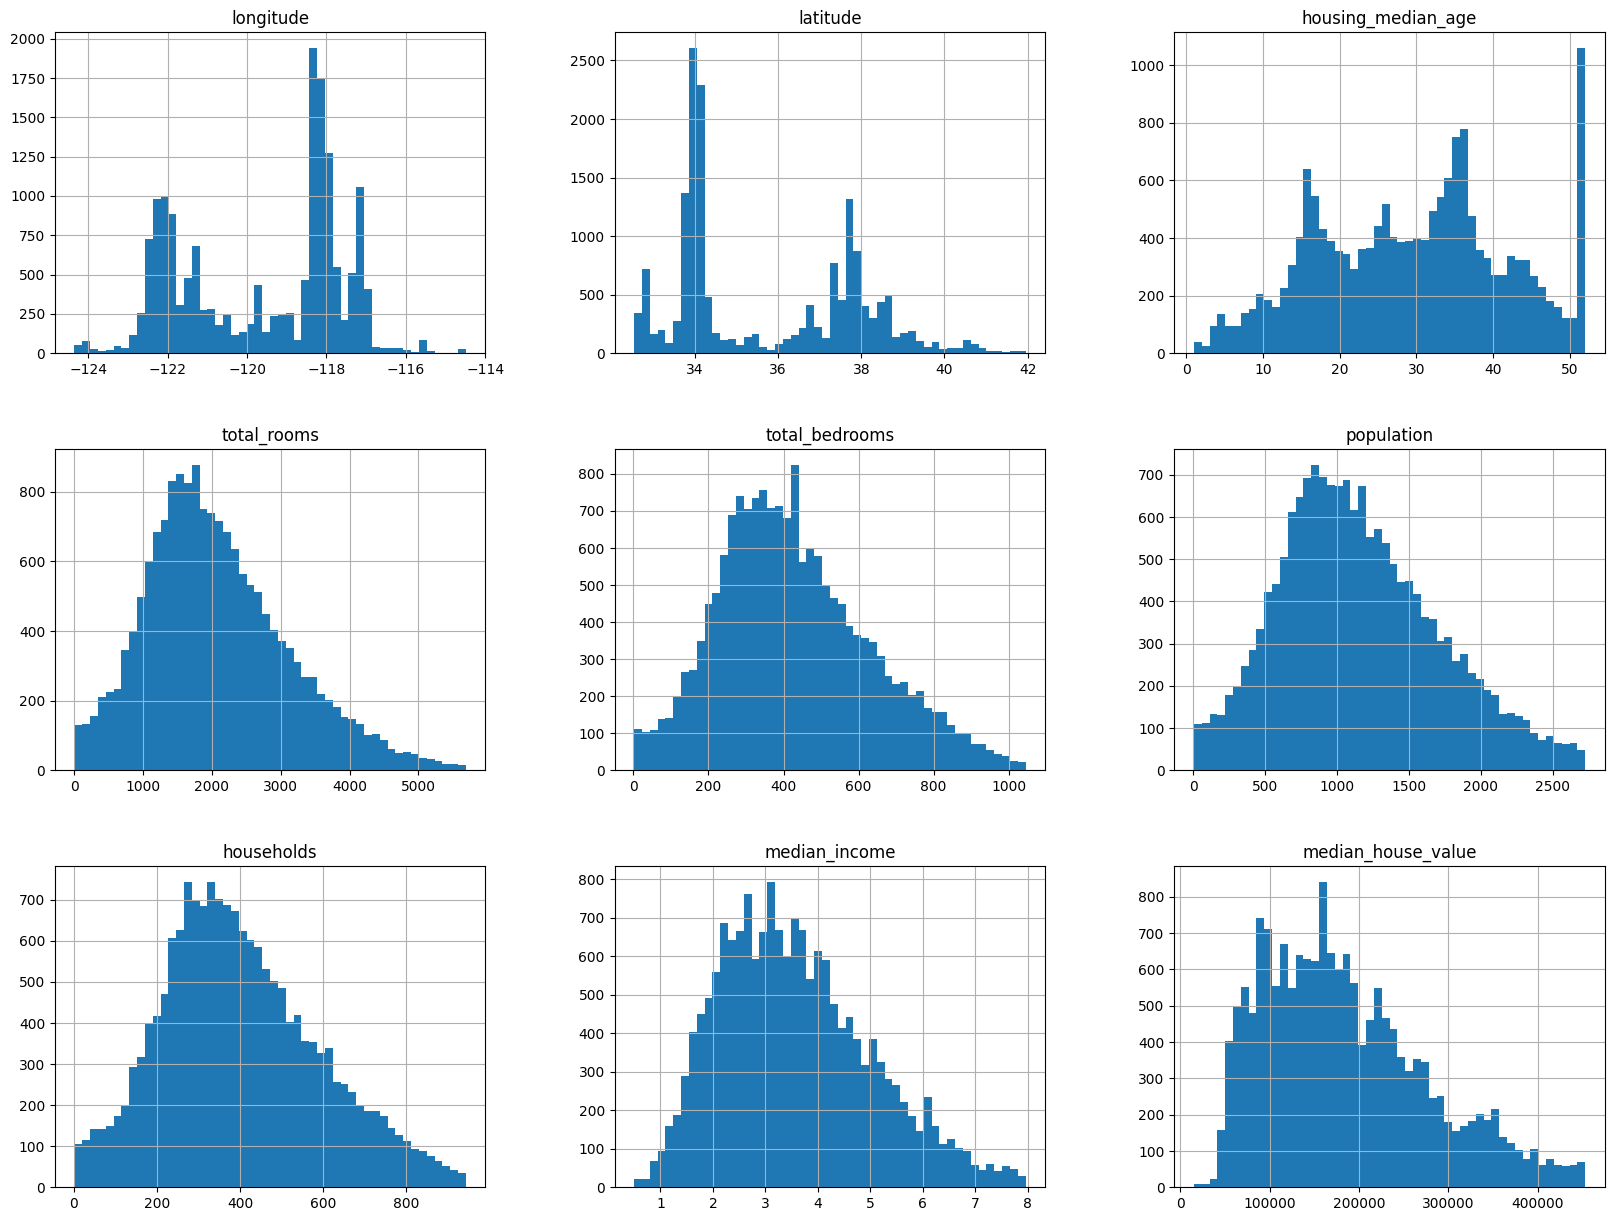

In [9]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()


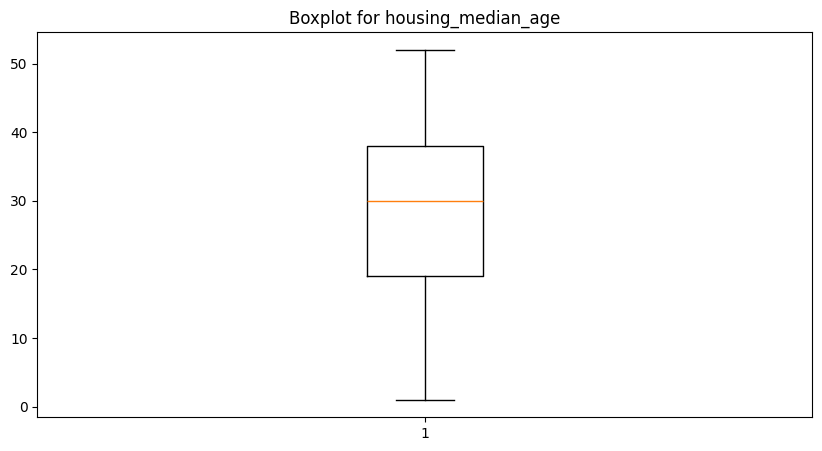

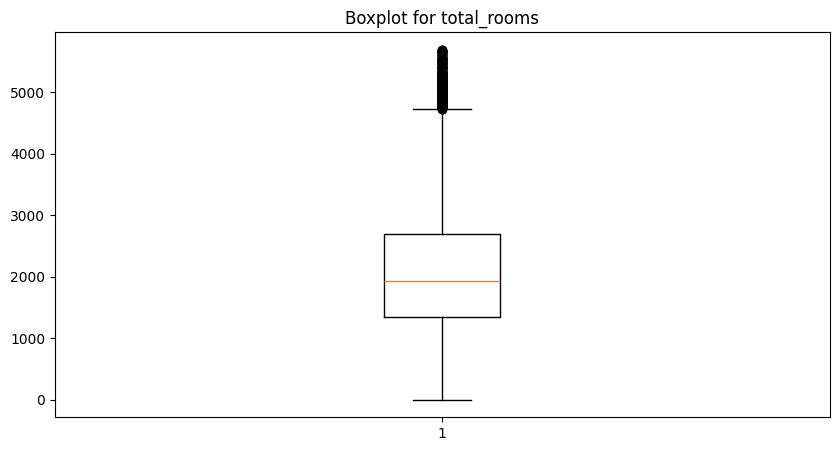

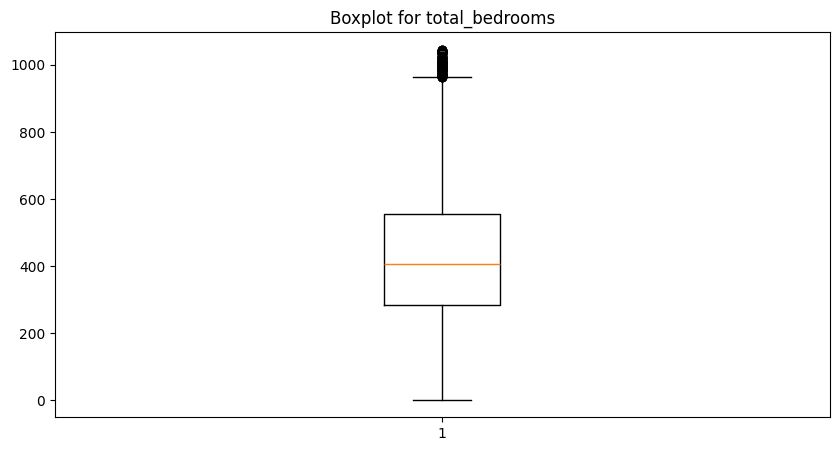

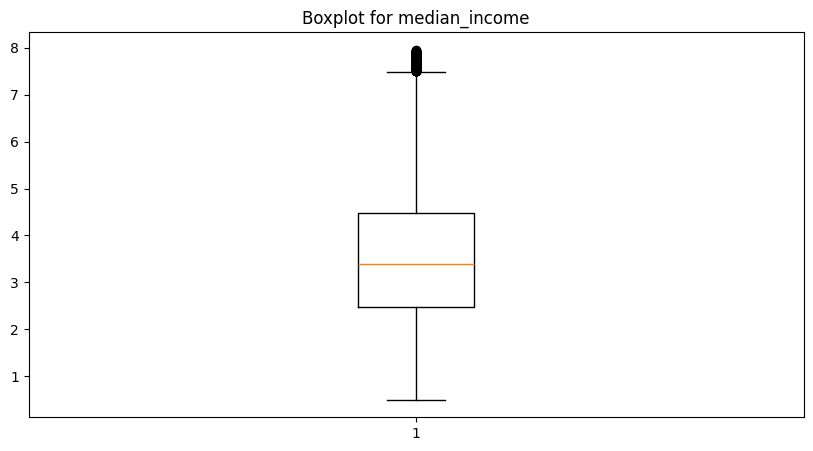

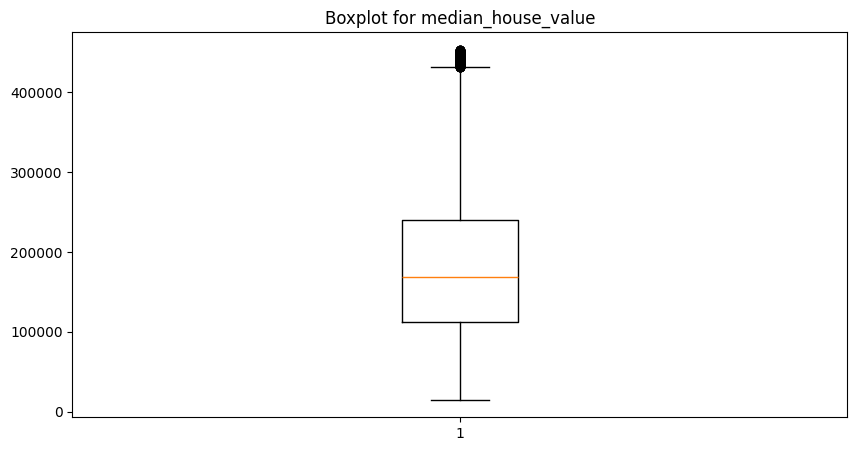

In [10]:
#Use boxplots to identify outliers in the data.
for col in ['housing_median_age', 'total_rooms', 'total_bedrooms', 'median_income', 'median_house_value']:
    plt.figure(figsize=(10, 5))
    plt.title(f'Boxplot for {col}')
    plt.boxplot(df[col])
    plt.show()


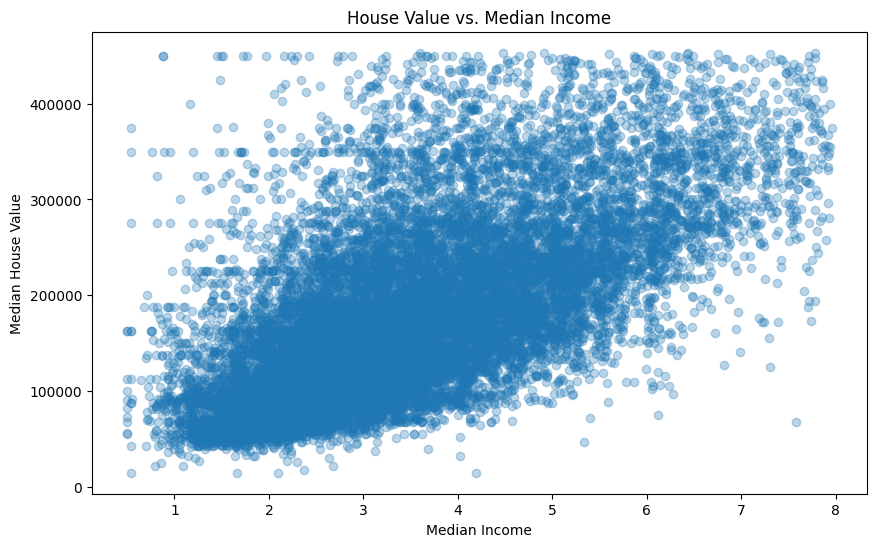

In [11]:
# identifying outliers in median_house_value only.
plt.figure(figsize=(10, 6))
ax1=plt.subplot()
ax1.scatter(df['median_income'], df['median_house_value'], alpha=0.3)
plt.title('House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


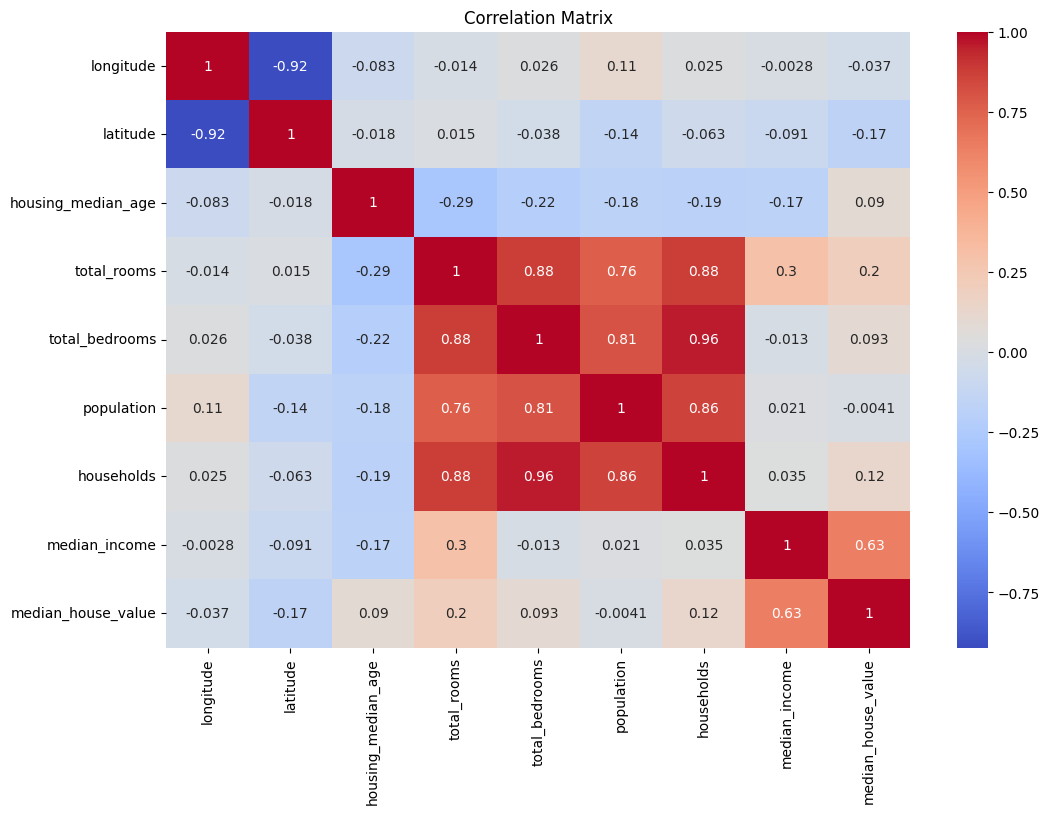

In [12]:
#correlation matrix
import seaborn as sns
# Select only numeric columns
numeric_data = df.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


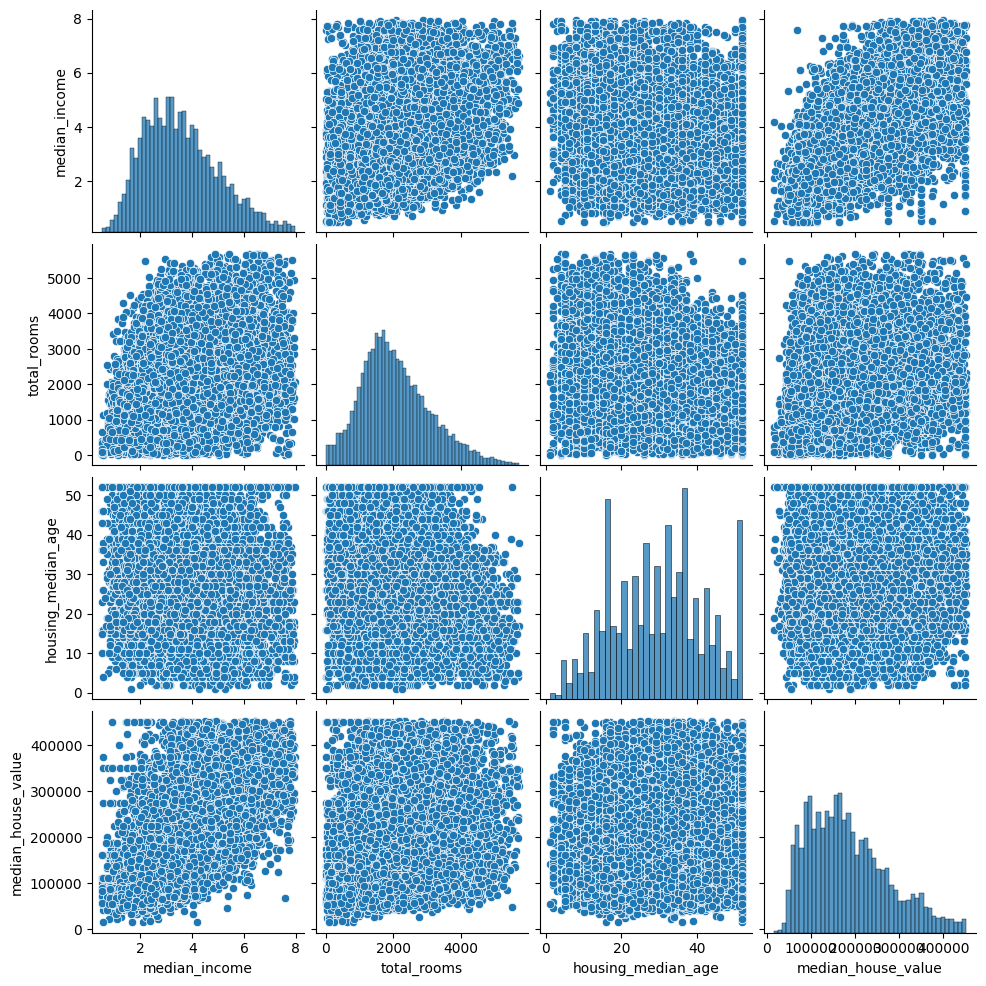

In [13]:
sns.pairplot(df[['median_income', 'total_rooms', 'housing_median_age', 'median_house_value']])
plt.show()


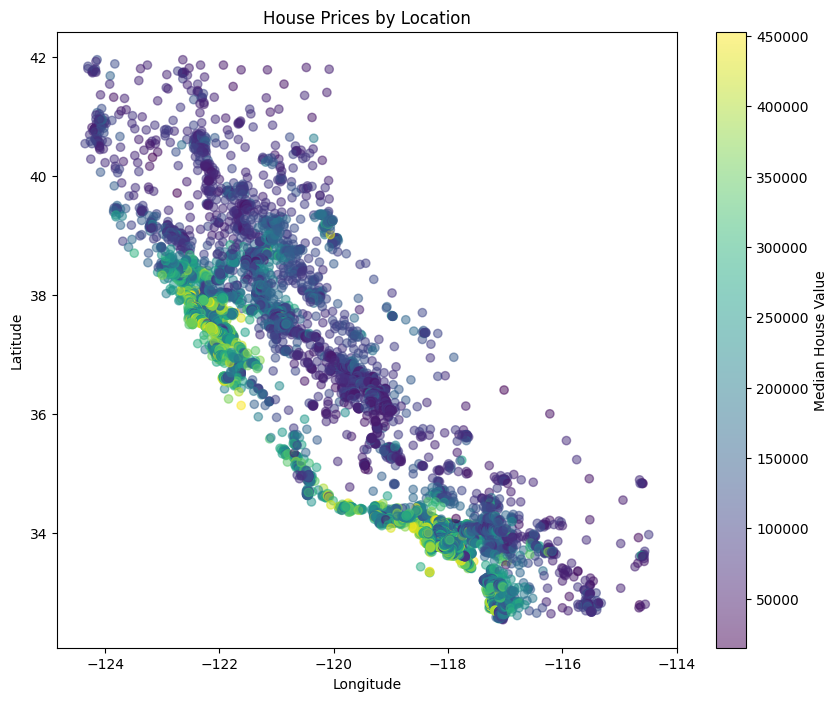

In [14]:
#visualizing house prices on a map can provide geographic insights.
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices by Location')
plt.show()

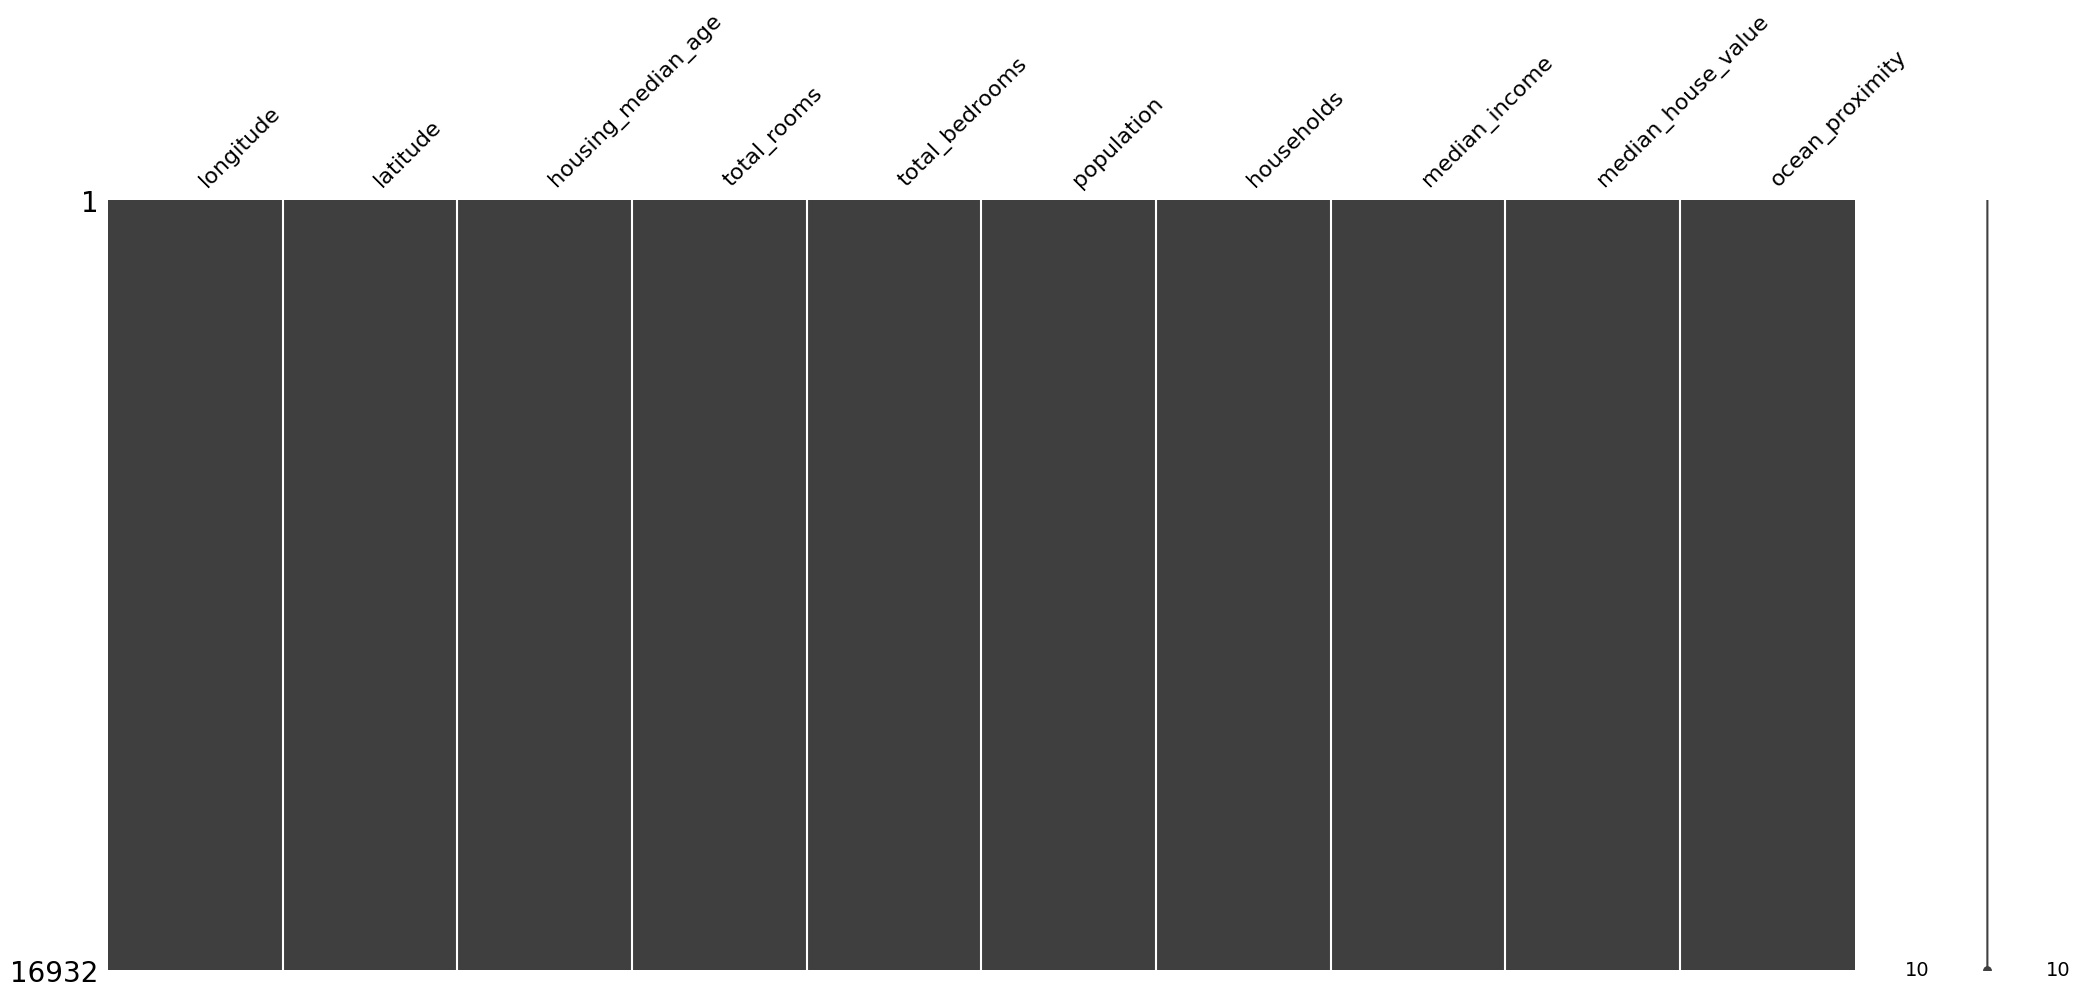

In [15]:
#missing data views
import missingno as msno
msno.matrix(df)
plt.show()


In [16]:
#Check Skewness and Kurtosis
from scipy.stats import skew, kurtosis
numeric_data = df.select_dtypes(include=[np.number])
for col in numeric_data.columns:
    print(f"{col} - Skewness: {skew(df[col])}, Kurtosis: {kurtosis(df[col])}")


longitude - Skewness: -0.2595606096958342, Kurtosis: -1.315214333450862
latitude - Skewness: 0.41956564657152046, Kurtosis: -1.1380468277400146
housing_median_age - Skewness: -0.0009388736574694759, Kurtosis: -0.7911426867392151
total_rooms - Skewness: 0.6158808386162453, Kurtosis: 0.20479321958628605
total_bedrooms - Skewness: 0.4736062526102151, Kurtosis: -0.149368382392844
population - Skewness: 0.43845653582213423, Kurtosis: -0.22634928176758784
households - Skewness: 0.4132415183298512, Kurtosis: -0.23451249429149623
median_income - Skewness: 0.5432112462892015, Kurtosis: -0.1625144711199562
median_house_value - Skewness: 0.7016753595221349, Kurtosis: -0.1099387510924501


Log Transformation for Skewed Features:
    If a feature is highly skewed, apply a log transformation.

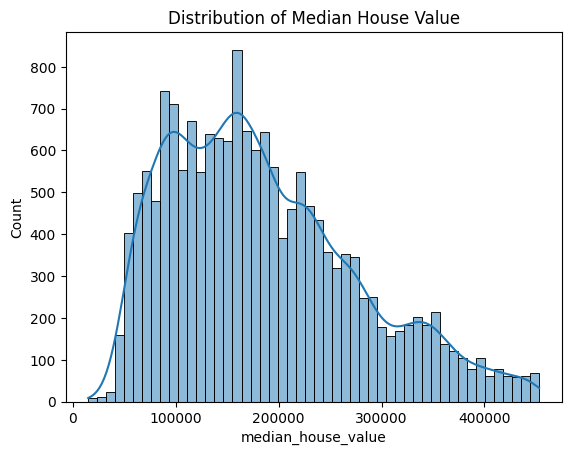

In [17]:
df['log_median_income'] = np.log1p(df['median_income'])
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.show()

In [18]:
#Feature Engineeering
df['rooms_per_household'] = df['total_rooms'] / df['households']
df.head(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,log_median_income,rooms_per_household
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.111110,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.893579,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1.578195,6.281853
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,1.616771,4.761658
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,1.538822,4.931907


In [19]:
#df.drop(columns=['total_rooms','households'],inplace=True,axis=1)
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,log_median_income,rooms_per_household
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.111110,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.893579,5.817352


In [20]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # One-Hot Encoding for the 'ocean_proximity' categorical column
# data_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# # Split the data again into training and testing sets
# train_set, test_set = train_test_split(data_encoded, test_size=0.2, random_state=42)

# # Separate features and target variable
# X_train = train_set.drop('median_house_value', axis=1)
# y_train = train_set['median_house_value']
# X_test = test_set.drop('median_house_value', axis=1)
# y_test = test_set['median_house_value']

# # Feature scaling: Normalize the features for better performance
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Print the shapes to confirm
# print(f"X_train_scaled shape: {X_train_scaled.shape}")
# print(f"X_test_scaled shape: {X_test_scaled.shape}")

# # Train the Linear Regression model on the cleaned dataset
# model = LinearRegression()
# model.fit(X_train_scaled, y_train)

# # Predict on test data
# predictions = model.predict(X_test_scaled)

# # Calculate evaluation metrics
# mae = mean_absolute_error(y_test, predictions)
# mse = mean_squared_error(y_test, predictions)

# print(f"Mean Absolute Error after outlier removal: {mae}")
# print(f"Mean Squared Error after outlier removal: {mse}")



In [21]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.impute import SimpleImputer

# # One-Hot Encoding for the 'ocean_proximity' categorical column
# data_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# # Split the data again into training and testing sets
# train_set, test_set = train_test_split(data_encoded, test_size=0.3, random_state=35)

# # Separate features and target variable
# X_train = train_set.drop('median_house_value', axis=1)
# y_train = train_set['median_house_value']
# X_test = test_set.drop('median_house_value', axis=1)
# y_test = test_set['median_house_value']

# # Feature scaling: Normalize the features for better performance
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Print the shapes to confirm
# print(f"X_train_scaled shape: {X_train_scaled.shape}")
# print(f"X_test_scaled shape: {X_test_scaled.shape}")


# # Train the Random Forest model
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train_scaled, y_train)

# # Predict on the test data
# predictions = model.predict(X_test_scaled)

# # Calculate evaluation metrics
# mae = mean_absolute_error(y_test, predictions)
# mse = mean_squared_error(y_test, predictions)

# print(f"Mean Absolute Error with Random Forest: {mae}")
# print(f"Mean Squared Error with Random Forest: {mse}")


In [22]:
#data=df.drop(columns=['total_rooms','households',],axis=1)

In [24]:
#data.head(2)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

# One-Hot Encoding for the 'ocean_proximity' categorical column
data_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Split the data again into training and testing sets
train_set, test_set = train_test_split(data_encoded, test_size=0.2, random_state=42)

# Separate features and target variable
X_train = train_set.drop('median_house_value', axis=1)
y_train = train_set['median_house_value']
X_test = test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value']

# Feature scaling: Normalize the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the shapes to confirm
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")


# Train the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test data
predictions = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"Mean Absolute Error with Random Forest: {mae}")
print(f"Mean Squared Error with Random Forest: {mse}")


X_train_scaled shape: (13545, 14)
X_test_scaled shape: (3387, 14)
Mean Absolute Error with Random Forest: 28841.423073516387
Mean Squared Error with Random Forest: 1793830136.660494


In [63]:
# from sklearn.ensemble import GradientBoostingRegressor
# # Feature scaling: Normalize the features for better performance
# # One-Hot Encoding for the 'ocean_proximity' categorical column
# data_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Print the shapes to confirm
# print(f"X_train_scaled shape: {X_train_scaled.shape}")
# print(f"X_test_scaled shape: {X_test_scaled.shape}")


# # Train the Gradient Boosting model
# gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, max_depth=3, random_state=42)
# gb_model.fit(X_train_scaled, y_train)

# # Predict on the test data
# gb_predictions = gb_model.predict(X_test_scaled)

# # Calculate evaluation metrics for Gradient Boosting
# gb_mae = mean_absolute_error(y_test, gb_predictions)
# gb_mse = mean_squared_error(y_test, gb_predictions)

# print(f"Gradient Boosting - Mean Absolute Error: {gb_mae}")
# print(f"Gradient Boosting - Mean Squared Error: {gb_mse}")


X_train_scaled shape: (13545, 14)
X_test_scaled shape: (3387, 14)
Gradient Boosting - Mean Absolute Error: 31171.89485001029
Gradient Boosting - Mean Squared Error: 1953807039.9179676


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# # One-Hot Encoding for the 'ocean_proximity' categorical column
# data_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
# # Split the data again into training and testing sets
# train_set, test_set = train_test_split(data_encoded, test_size=0.2, random_state=42)

# # Separate features and target variable
# X_train = train_set.drop('median_house_value', axis=1)
# y_train = train_set['median_house_value']
# X_test = test_set.drop('median_house_value', axis=1)
# y_test = test_set['median_house_value']

# # Feature scaling: Normalize the features for better performance
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# # Set up the parameter grid for Random Forest
# rf_param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# # Perform Grid Search with Cross-Validation for Random Forest
# rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=3, scoring='neg_mean_squared_error')
# rf_grid_search.fit(X_train_scaled, y_train)

# # Get the best Random Forest model
# best_rf_model = rf_grid_search.best_estimator_

# # Predict using the best Random Forest model
# best_rf_predictions = best_rf_model.predict(X_test_scaled)

# # Calculate evaluation metrics for the tuned Random Forest
# best_rf_mae = mean_absolute_error(y_test, best_rf_predictions)
# best_rf_mse = mean_squared_error(y_test, best_rf_predictions)

# print(f"Tuned Random Forest - Mean Absolute Error: {best_rf_mae}")
# print(f"Tuned Random Forest - Mean Squared Error: {best_rf_mse}")


In [27]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import joblib

# Save the model to a file
joblib.dump(model, 'house_price_model.pkl')


['house_price_model.pkl']